# Credit Risk Analysis
## AI Pioneers

### Here, we´ll analyze a dataset containing several variables, and it´s outcome is the person credit status (default/ non default), we´ll compare different ML aproaches and select the best fit to solve the problem.

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
plt. style. use ('ggplot')
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve


2024-06-13 17:02:12.077615: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-13 17:02:12.077757: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-13 17:02:12.234914: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Data processing

In [2]:
df = pd.read_csv('/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv')
print(f"We have {df.shape[1]-1} variables and {df.shape[0]} registers in the dataset.\n")
df.T

We have 11 variables and 32581 registers in the dataset.



,0,1,2,3,4,5,6,7,8,9,...,32571,32572,32573,32574,32575,32576,32577,32578,32579,32580
person_age,22,21,25,23,24,21,26,24,24,21,...,60,52,56,52,52,57,54,65,56,66
person_income,59000,9600,9600,65500,54400,9900,77100,78956,83000,10000,...,45600,52000,90000,65004,64500,53000,120000,76000,150000,42000
person_home_ownership,RENT,OWN,MORTGAGE,RENT,RENT,OWN,RENT,RENT,RENT,OWN,...,RENT,OWN,MORTGAGE,RENT,RENT,MORTGAGE,MORTGAGE,RENT,MORTGAGE,RENT
person_emp_length,123.0,5.0,1.0,4.0,8.0,2.0,8.0,5.0,8.0,6.0,...,1.0,0.0,0.0,4.0,0.0,1.0,4.0,3.0,5.0,2.0
loan_intent,PERSONAL,EDUCATION,MEDICAL,MEDICAL,MEDICAL,VENTURE,EDUCATION,MEDICAL,PERSONAL,VENTURE,...,VENTURE,PERSONAL,PERSONAL,PERSONAL,EDUCATION,PERSONAL,PERSONAL,HOMEIMPROVEMENT,PERSONAL,MEDICAL
loan_grade,D,B,C,C,C,A,B,B,A,D,...,B,A,A,D,B,C,A,B,B,B
loan_amnt,35000,1000,5500,35000,35000,2500,35000,35000,35000,1600,...,20000,9600,7200,20000,5000,5800,17625,35000,15000,6475
loan_int_rate,16.02,11.14,12.87,15.23,14.27,7.14,12.42,11.11,8.9,14.74,...,10.0,8.49,6.17,15.58,11.26,13.16,7.49,10.99,11.48,9.99
loan_status,1,0,1,1,1,1,1,1,1,1,...,1,0,0,1,0,0,0,1,0,0
loan_percent_income,0.59,0.1,0.57,0.53,0.55,0.25,0.45,0.44,0.42,0.16,...,0.44,0.18,0.08,0.31,0.08,0.11,0.15,0.46,0.1,0.15


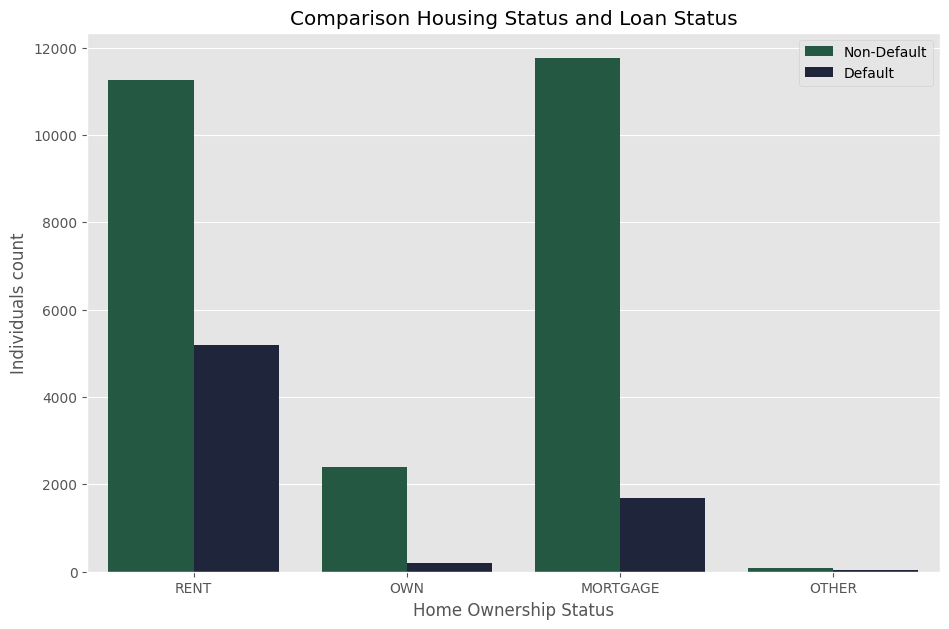

In [3]:
plt.figure(figsize=(11,7))
housing = df['person_home_ownership'].unique()
sns.countplot(x='person_home_ownership',order = housing, data = df,hue='loan_status', palette = sns.color_palette(palette="cubehelix")[:2][::-1])
plt.legend(labels=["Non-Default", "Default"])
plt.xlabel("Home Ownership Status")
plt.ylabel("Individuals count")
plt.title("Comparison Housing Status and Loan Status");

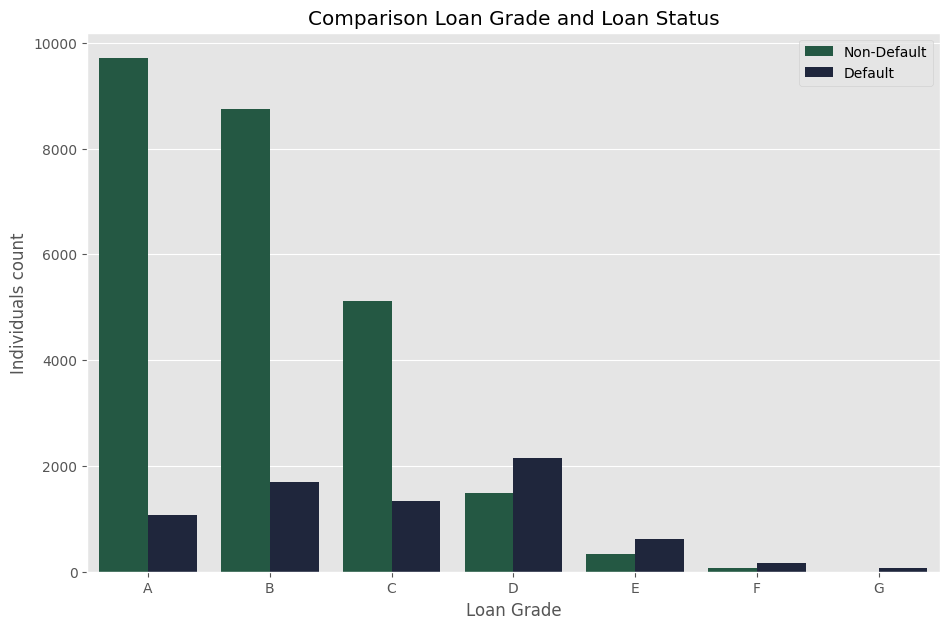

In [4]:
plt.figure(figsize=(11,7))
grades = sorted(df['loan_grade'].unique())
sns.countplot(x='loan_grade',order = grades, data = df,hue='loan_status', palette = sns.color_palette(palette="cubehelix")[:2][::-1])
plt.xlabel("Loan Grade")
plt.ylabel("Individuals count")
plt.legend(labels=["Non-Default", "Default"])
plt.title("Comparison Loan Grade and Loan Status");

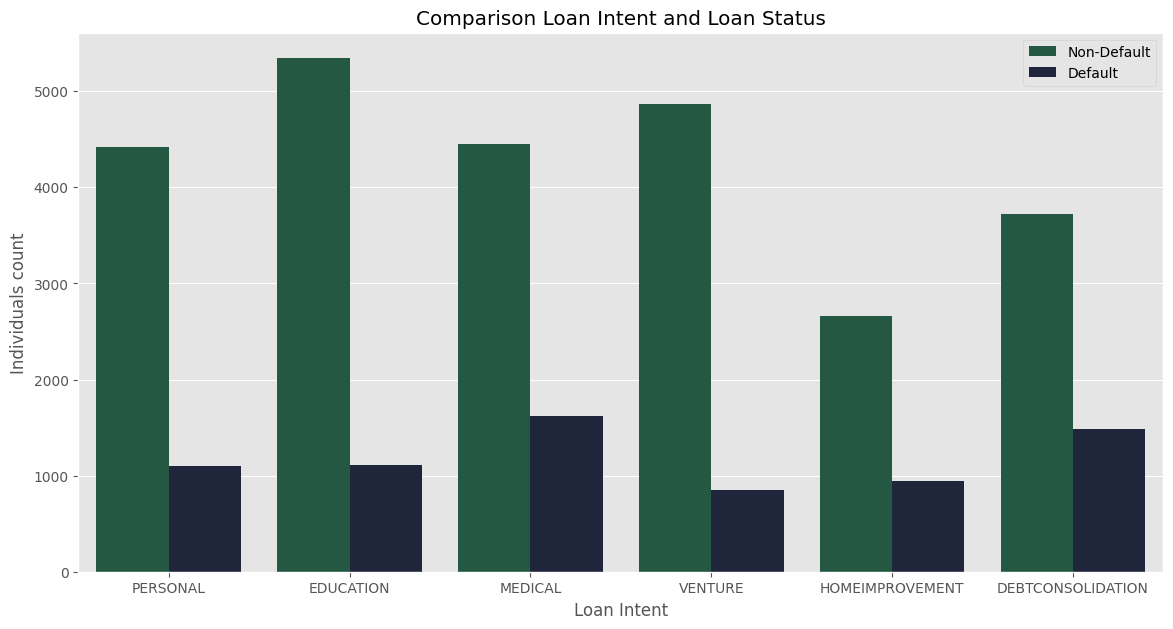

In [5]:
plt.figure(figsize=(14,7))
intent = df['loan_intent'].unique()
sns.countplot(x='loan_intent',order = intent, data = df,hue='loan_status', palette = sns.color_palette(palette="cubehelix")[:2][::-1])
plt.legend(labels=["Non-Default", "Default"])
plt.xlabel("Loan Intent")
plt.ylabel("Individuals count")
plt.title("Comparison Loan Intent and Loan Status");

In [6]:
df = pd.get_dummies(df, columns=["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]) 
df.dropna(inplace=True)

In [7]:
df.shape

(28638, 27)

In [8]:
# Define our X and Y data, loan_status is our target variable.
Y = df["loan_status"]
X = df.drop(columns=["loan_status"])

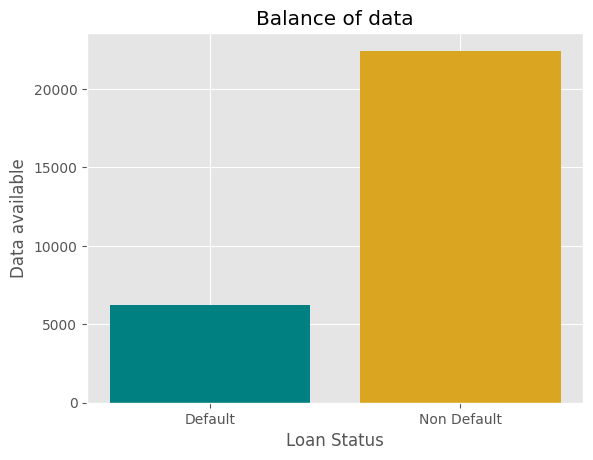

In [9]:
ones = sum(Y)
zeros = len(Y)-ones
plt.bar(["Default","Non Default"],[ones, zeros], color= ["teal", "goldenrod"]);
plt.title("Balance of data");
plt.xlabel("Loan Status");
plt.ylabel("Data available");

In [10]:
from imblearn.over_sampling import BorderlineSMOTE

smote = BorderlineSMOTE()
X, Y = smote.fit_resample(X, Y)

In [11]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,Y ,random_state=10, test_size=0.2) 

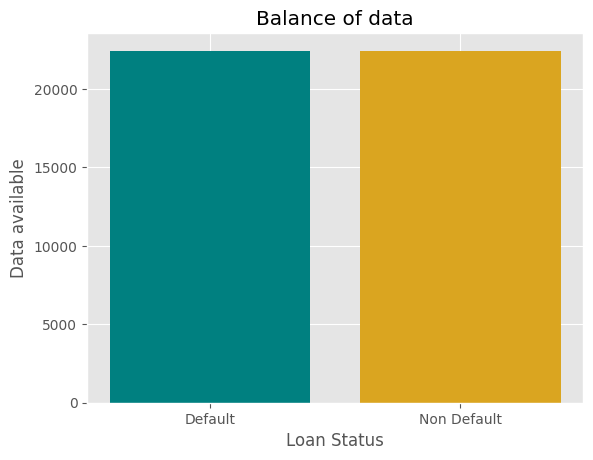

In [12]:
# Check if the data is balanced or not
ones = sum(Y)
zeros = len(Y)-ones
plt.bar(["Default","Non Default"],[ones, zeros], color= ["teal", "goldenrod"]);
plt.title("Balance of data");
plt.xlabel("Loan Status");
plt.ylabel("Data available");

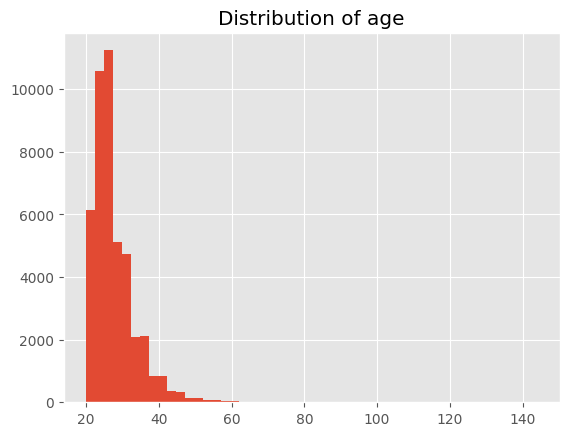

In [13]:
plt.hist(X.person_age, bins = 50);
plt.title("Distribution of age");

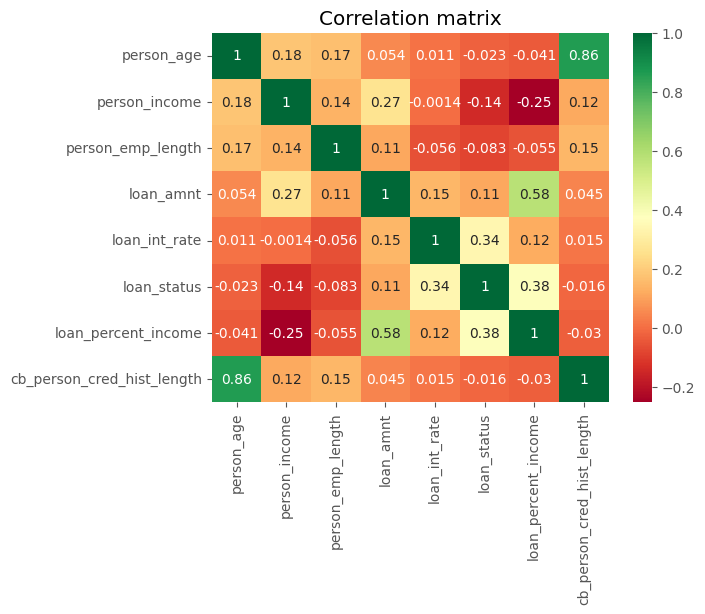

In [14]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap="RdYlGn");
plt.title("Correlation matrix");

In [15]:
def get_corrs(corrs):
    return pd.concat([corrs[0:3],corrs[-3:]])

In [16]:
corrs = get_corrs(df.corr()['loan_status'].sort_values().drop('loan_status'))

Text(0, 0.5, 'Correlation coefficient')

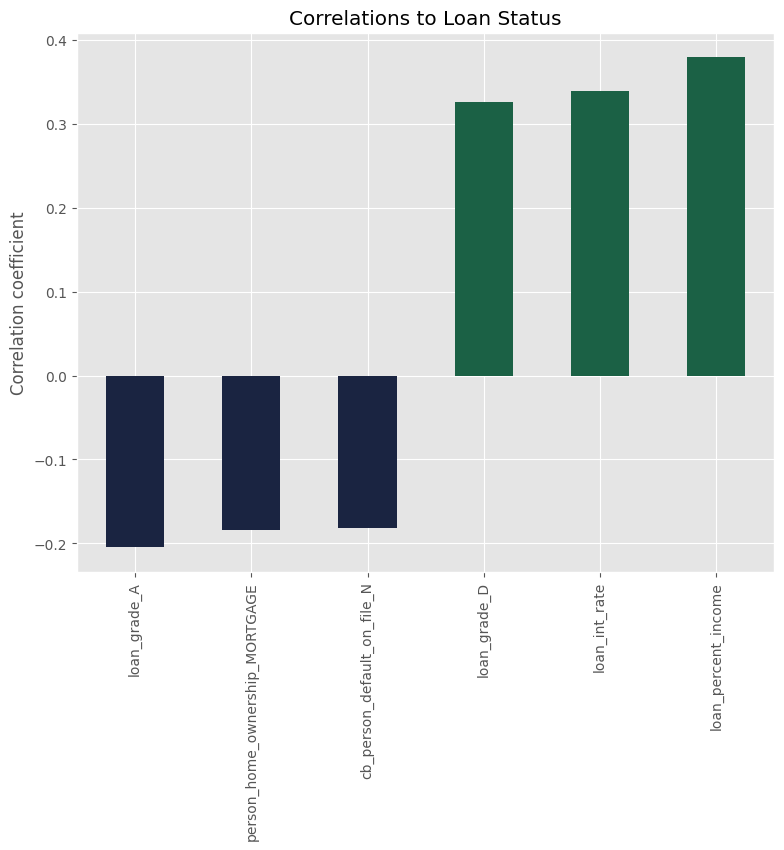

In [17]:
fig, ax = plt.subplots(figsize=(9, 7))
corrs.plot(kind='bar', color=(corrs > 0).map({True: sns.color_palette(palette="cubehelix")[1], False: sns.color_palette(palette="cubehelix")[0]}))
plt.title("Correlations to Loan Status");
plt.ylabel("Correlation coefficient")
#ax.bar_label(["Loan Grade A", "Home Mortgage", "No Historical default", "Loan Grade D", "Interest Rate", "Loan as percent of income"])


In [18]:
X.apply(pd.to_numeric)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.000000,35000,16.020000,0.590000,3,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,21,9600,5.000000,1000,11.140000,0.100000,2,False,False,True,...,False,False,True,False,False,False,False,False,True,False
2,25,9600,1.000000,5500,12.870000,0.570000,3,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,23,65500,4.000000,35000,15.230000,0.530000,2,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,24,54400,8.000000,35000,14.270000,0.550000,4,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44865,30,31028,12.474984,3000,8.798834,0.100000,6,True,False,False,...,False,True,False,False,True,False,False,False,True,True
44866,22,54000,1.985186,7000,15.047850,0.130000,3,False,False,False,...,False,False,False,False,True,False,True,False,True,False
44867,23,24000,0.624104,1187,18.290717,0.047518,3,False,False,False,...,False,False,False,False,False,True,False,False,True,True
44868,25,50000,8.302632,20000,13.438368,0.400000,3,False,False,False,...,True,False,False,True,False,False,False,False,True,False


In [19]:
from IPython.display import display, Markdown, Latex

In [20]:
models = [LinearRegression(),LogisticRegression(C=1e5), Ridge(alpha = 0.5)]

In [21]:
def get_binary(Y):
    y_binary = []
    for value in Y:
        y_binary.append(1) if value>0.5 else y_binary.append(0)
    return y_binary

In [22]:
def confusion_mat(y,y_pred, model_name):
    ax= plt.subplot()
    sns.heatmap(confusion_matrix(y, y_pred),cmap="RdYlGn", annot = True, fmt="d")
    plt.title(f"Confusion matrix for {model_name}")
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    return plt.show()

In [23]:
def plot_roc(y,y_pred, model_name):
    fig, ax = plt.subplots(figsize=(11, 7))
    fpr, tpr, thresh = roc_curve(y, y_pred)
    aucknn = roc_auc_score(y, y_pred)
    ax.plot(fpr, tpr, label=f'AUC = {str(round(aucknn,3))}', color = "darkgreen", linestyle = "dashed")
    print(fpr, tpr)
    ax.plot([0,1],[0,1], label="Naive model", color = "black");
    plt.legend()
    plt.title(f"ROC Curve for {model_name}")
    ax.fill_between(fpr, tpr, color='darkgreen', alpha=0.3)
    return plt.show()

In [24]:
def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title(f"Features weight for { type(model).__name__}")
    plt.tight_layout()
    return plt.show()

### LinearRegression:


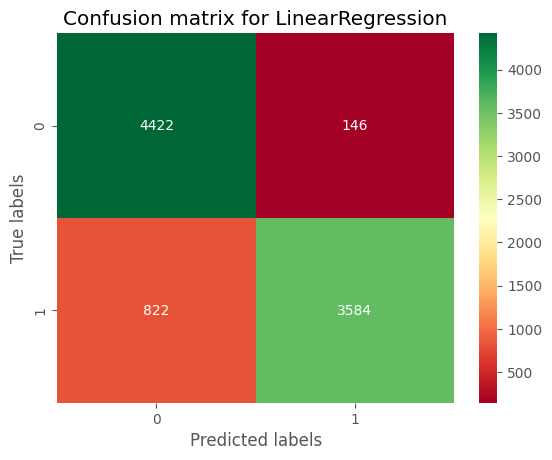

#### Classification Report for LinearRegression


              precision    recall  f1-score   support

           0       0.84      0.97      0.90      4568
           1       0.96      0.81      0.88      4406

    accuracy                           0.89      8974
   macro avg       0.90      0.89      0.89      8974
weighted avg       0.90      0.89      0.89      8974


[0.         0.         0.         ... 0.99671629 0.99715412 1.        ] [0.00000000e+00 2.26963232e-04 1.62278711e-01 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


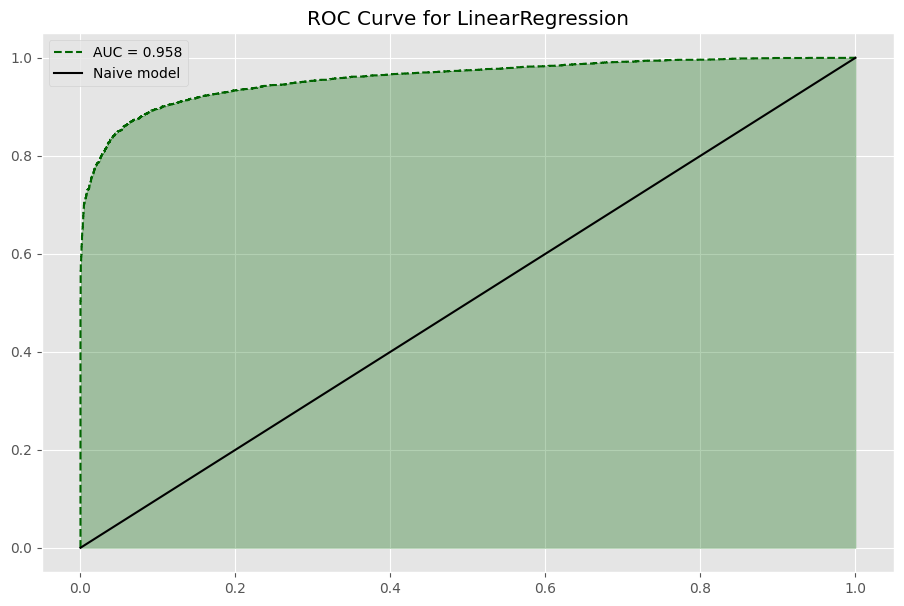

## -------------------------------------------------------------------------------------

### LogisticRegression:


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


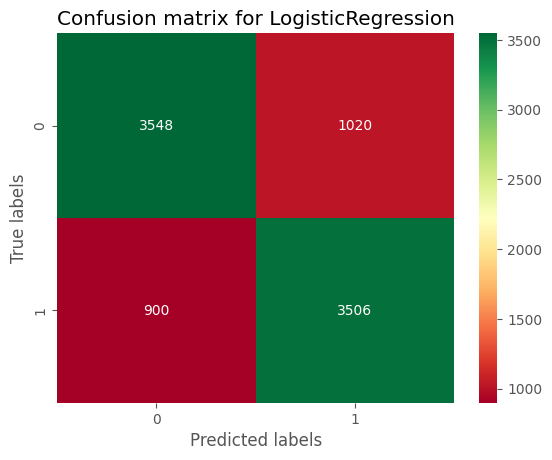

#### Classification Report for LogisticRegression


              precision    recall  f1-score   support

           0       0.80      0.78      0.79      4568
           1       0.77      0.80      0.79      4406

    accuracy                           0.79      8974
   macro avg       0.79      0.79      0.79      8974
weighted avg       0.79      0.79      0.79      8974


[0.         0.22329247 1.        ] [0.         0.79573309 1.        ]


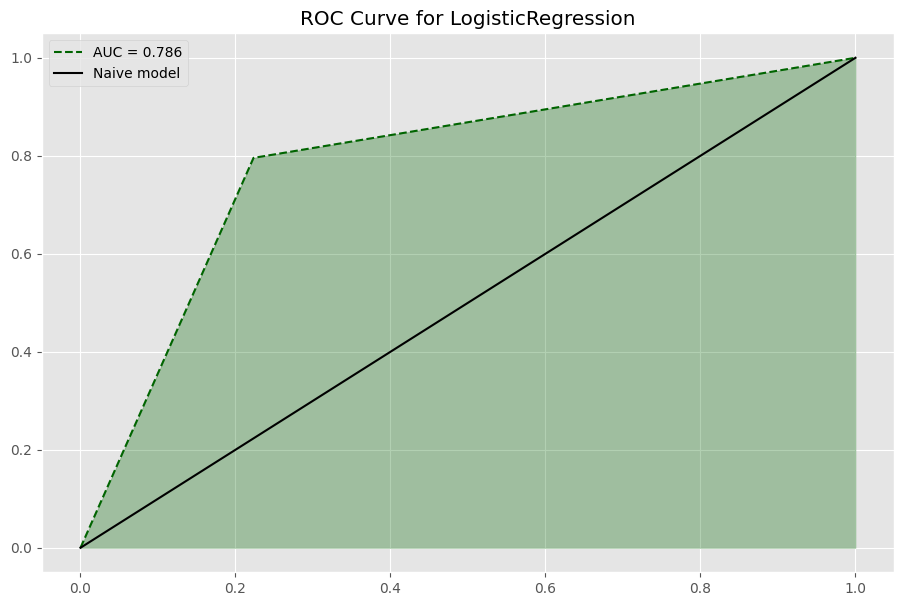

## -------------------------------------------------------------------------------------

### Ridge:


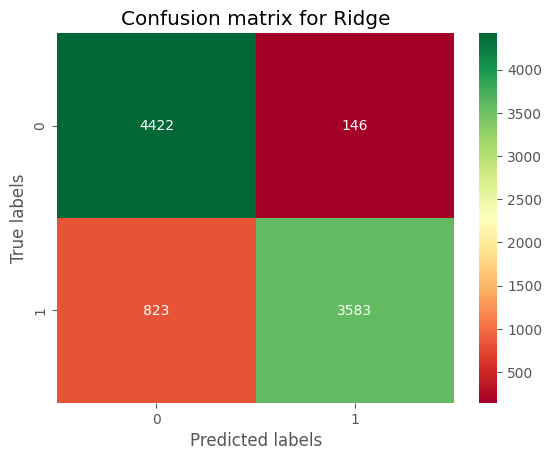

#### Classification Report for Ridge


              precision    recall  f1-score   support

           0       0.84      0.97      0.90      4568
           1       0.96      0.81      0.88      4406

    accuracy                           0.89      8974
   macro avg       0.90      0.89      0.89      8974
weighted avg       0.90      0.89      0.89      8974


[0.         0.         0.         ... 0.99671629 0.99715412 1.        ] [0.00000000e+00 2.26963232e-04 1.62278711e-01 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


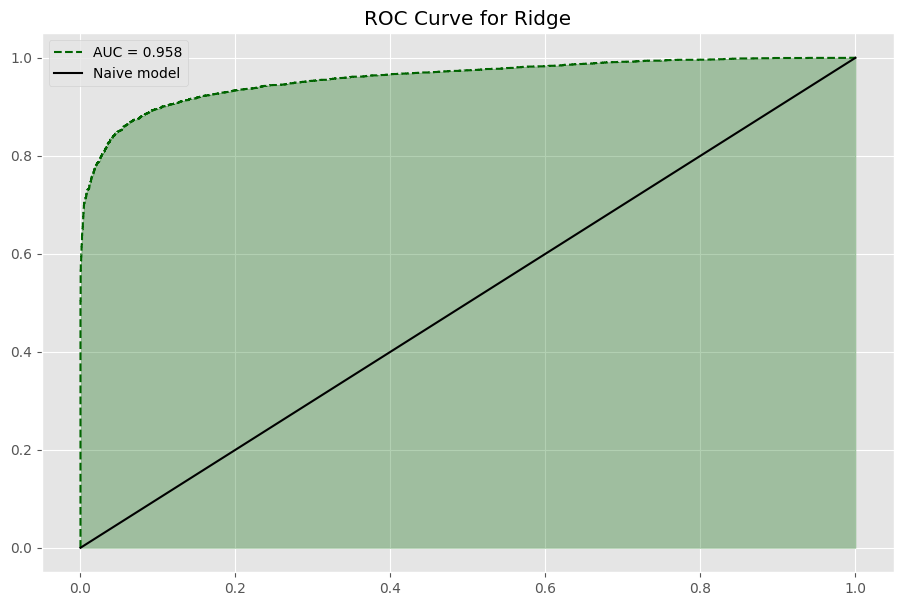

## -------------------------------------------------------------------------------------

In [25]:
metrics = {}
for model in models:
    display(Markdown(f'### {type(model).__name__}:\n'))
    model.fit(X_train, y_train)
    ytest_pred = model.predict(X_test)
    
    confusion_mat(y_test,get_binary(ytest_pred), type(model).__name__)
    #Metrics
    report = classification_report(y_test,get_binary(ytest_pred), output_dict=True)
    display(Markdown(f"#### Classification Report for {type(model).__name__}\n"))
    display(Markdown(classification_report(y_test,get_binary(ytest_pred))))
    metrics[type(model).__name__] = report['macro avg']
    
    #ROC
    plot_roc(y_test, ytest_pred, type(model).__name__ )
    display(Markdown('## -------------------------------------------------------------------------------------'))
    

In [26]:
pd.DataFrame(metrics)

,LinearRegression,LogisticRegression,Ridge
precision,0.902054,0.786149,0.901968
recall,0.890737,0.786220,0.890624
f1-score,0.891184,0.786044,0.891069
support,8974.000000,8974.000000,8974.000000


## Next step: Random Forest

### RandomForestClassifier:


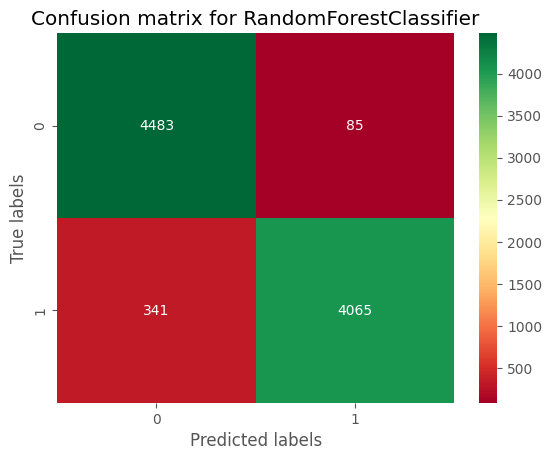

#### Classification Report for RandomForestClassifier


              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4568
           1       0.98      0.92      0.95      4406

    accuracy                           0.95      8974
   macro avg       0.95      0.95      0.95      8974
weighted avg       0.95      0.95      0.95      8974

[0.         0.01860771 1.        ] [0.         0.92260554 1.        ]


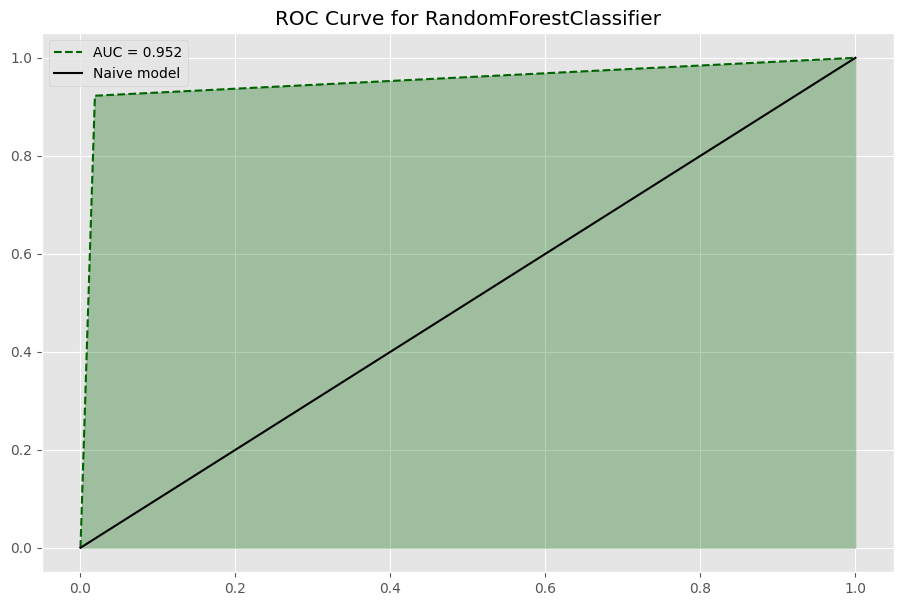

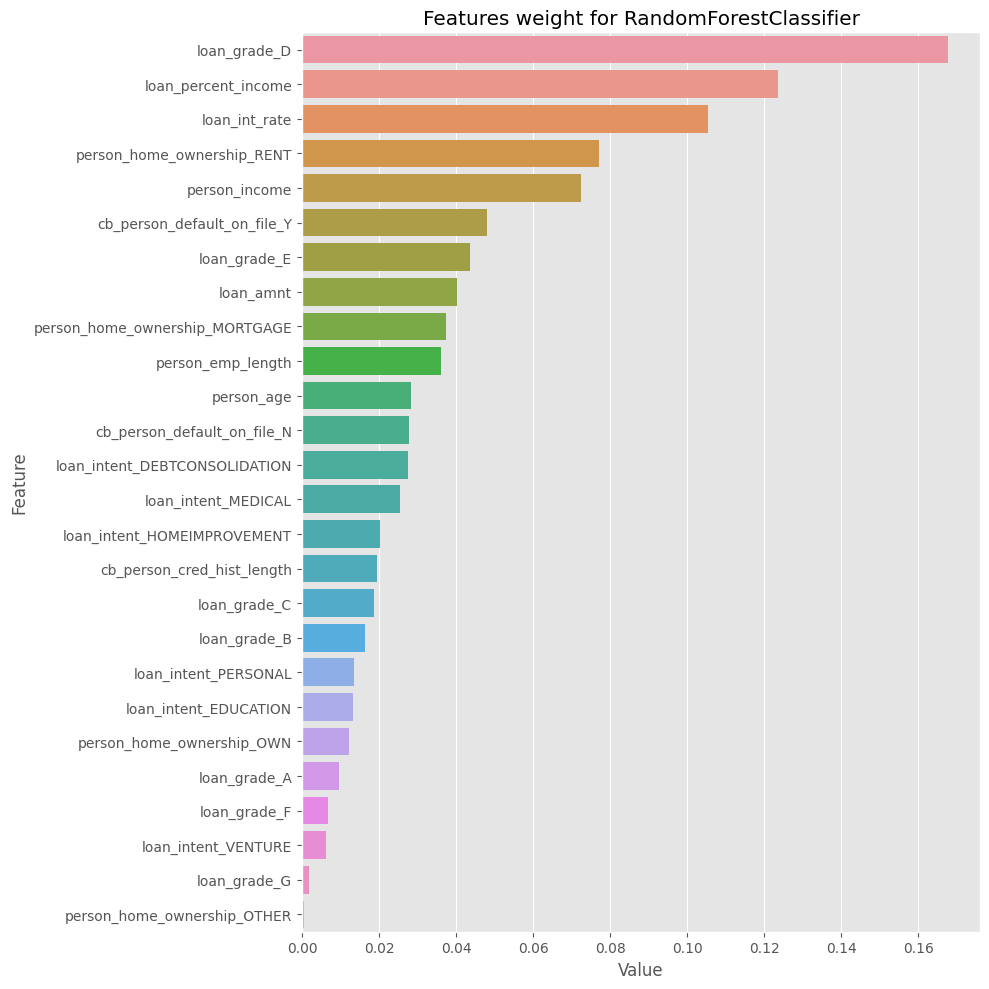

## -------------------------------------------------------------

### XGBClassifier:


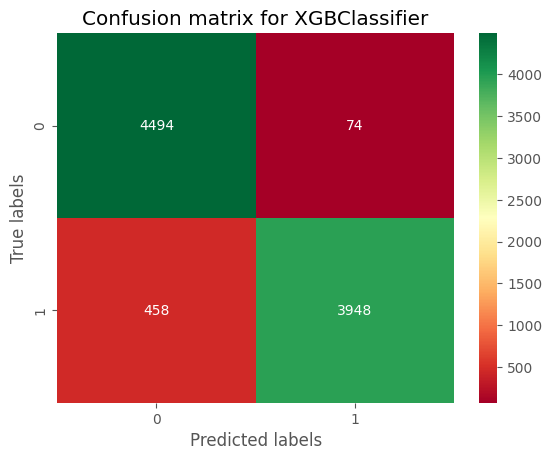

#### Classification Report for XGBClassifier


              precision    recall  f1-score   support

           0       0.91      0.98      0.94      4568
           1       0.98      0.90      0.94      4406

    accuracy                           0.94      8974
   macro avg       0.94      0.94      0.94      8974
weighted avg       0.94      0.94      0.94      8974

[0.         0.01619965 1.        ] [0.         0.89605084 1.        ]


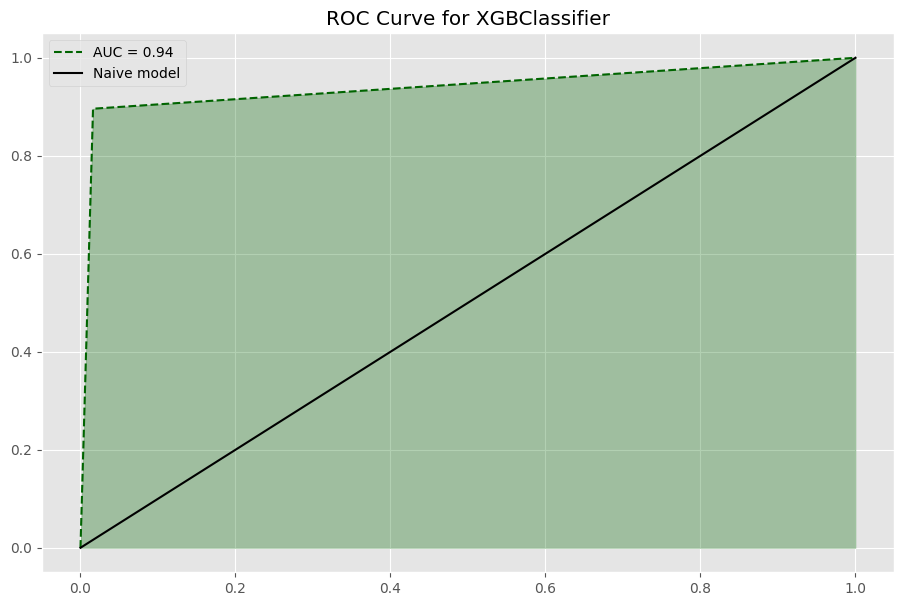

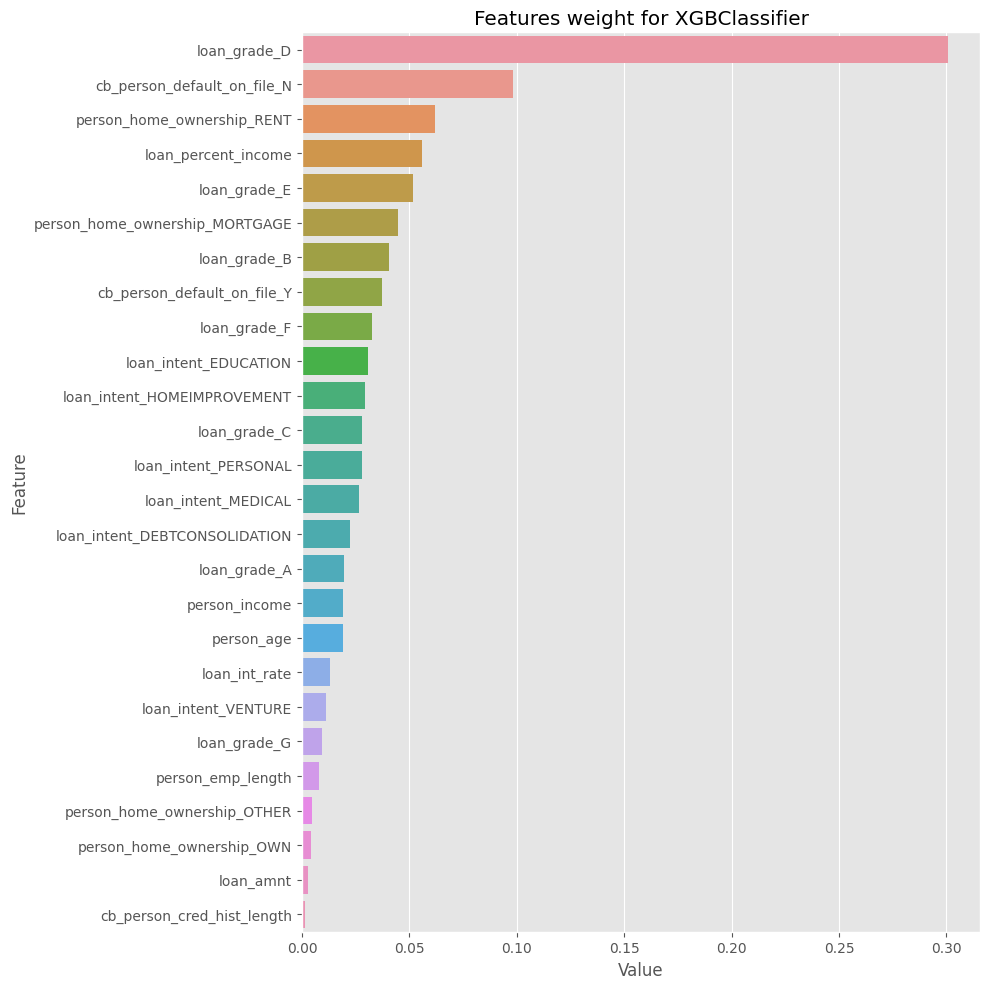

## -------------------------------------------------------------

In [27]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

rf_models = [(RandomForestClassifier(n_estimators=15, random_state=10)),XGBClassifier(n_estimators = 12, random_state = 10, gamma = 0.05) ]
for model in rf_models:
    display(Markdown(f'### {type(model).__name__}:\n'))
    model.fit(X_train, y_train)
    ytest_pred = model.predict(X_test)
    
    confusion_mat(y_test,get_binary(ytest_pred), type(model).__name__)
    #Metrics
    report = classification_report(y_test,get_binary(ytest_pred), output_dict=True)
    display(Markdown(f"#### Classification Report for {type(model).__name__}\n"))
    print(classification_report(y_test,get_binary(ytest_pred)))
    metrics[type(model).__name__] = report['macro avg']
    
    #ROC
    plot_roc(y_test, ytest_pred, type(model).__name__ )
    
    plot_importance(model, X_train)
    display(Markdown('## -------------------------------------------------------------'))
    

In [28]:
#import joblib
#joblib.dump(model4, "credit_random_forest.joblib")

In [29]:
def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(17, 8))
    sns.barplot(y="Value", x="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:8])
    plt.title(f"Features weight for { type(model).__name__}")
    plt.tight_layout()
    plt.show()

### Xboost

In [30]:
from xgboost import XGBClassifier
model5 = XGBClassifier(n_estimators = 12, random_state = 10, gamma = 0.05)
model5.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.05, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=12, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

Classification Report
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      4568
           1       0.98      0.90      0.94      4406

    accuracy                           0.94      8974
   macro avg       0.94      0.94      0.94      8974
weighted avg       0.94      0.94      0.94      8974



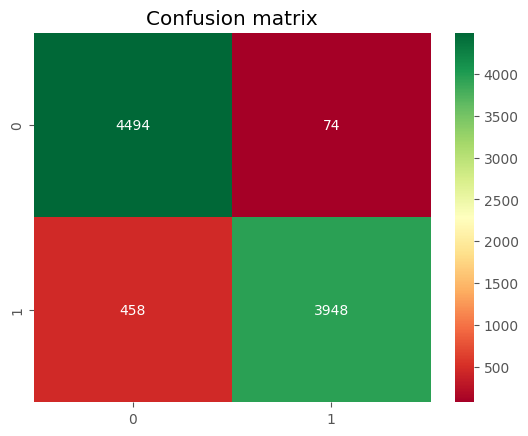

In [31]:
ytest_pred = model5.predict(X_test) 
sns.heatmap(confusion_matrix(y_test, ytest_pred),cmap="RdYlGn", annot = True, fmt="d")
plt.title("Confusion matrix")
print("Classification Report\n",classification_report(y_test,ytest_pred))

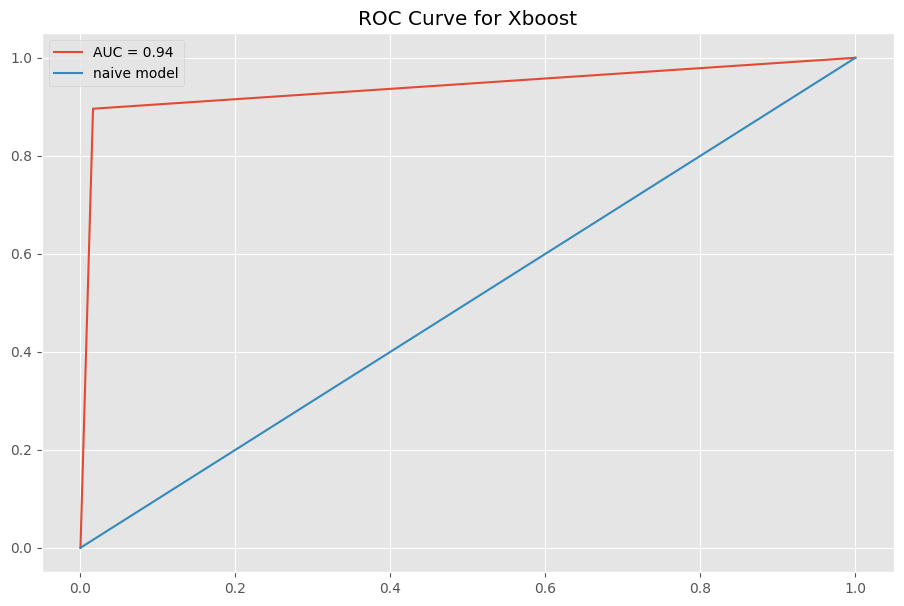

In [32]:
def plot_auc(model, y_test, y_test_pred, name):
    plt.figure(figsize=(11, 7))
    fpr, tpr, thresh = roc_curve(y_test, ytest_pred)
    aucknn = roc_auc_score(y_test, ytest_pred)
    plt.plot(fpr, tpr, label=f'AUC = {str(round(aucknn,3))}')
    plt.plot([0,1],[0,1], label="naive model");
    plt.legend()
    plt.title(f"ROC Curve for {name}")
    plt.show()
plot_auc(model5,y_test, ytest_pred, "Xboost")

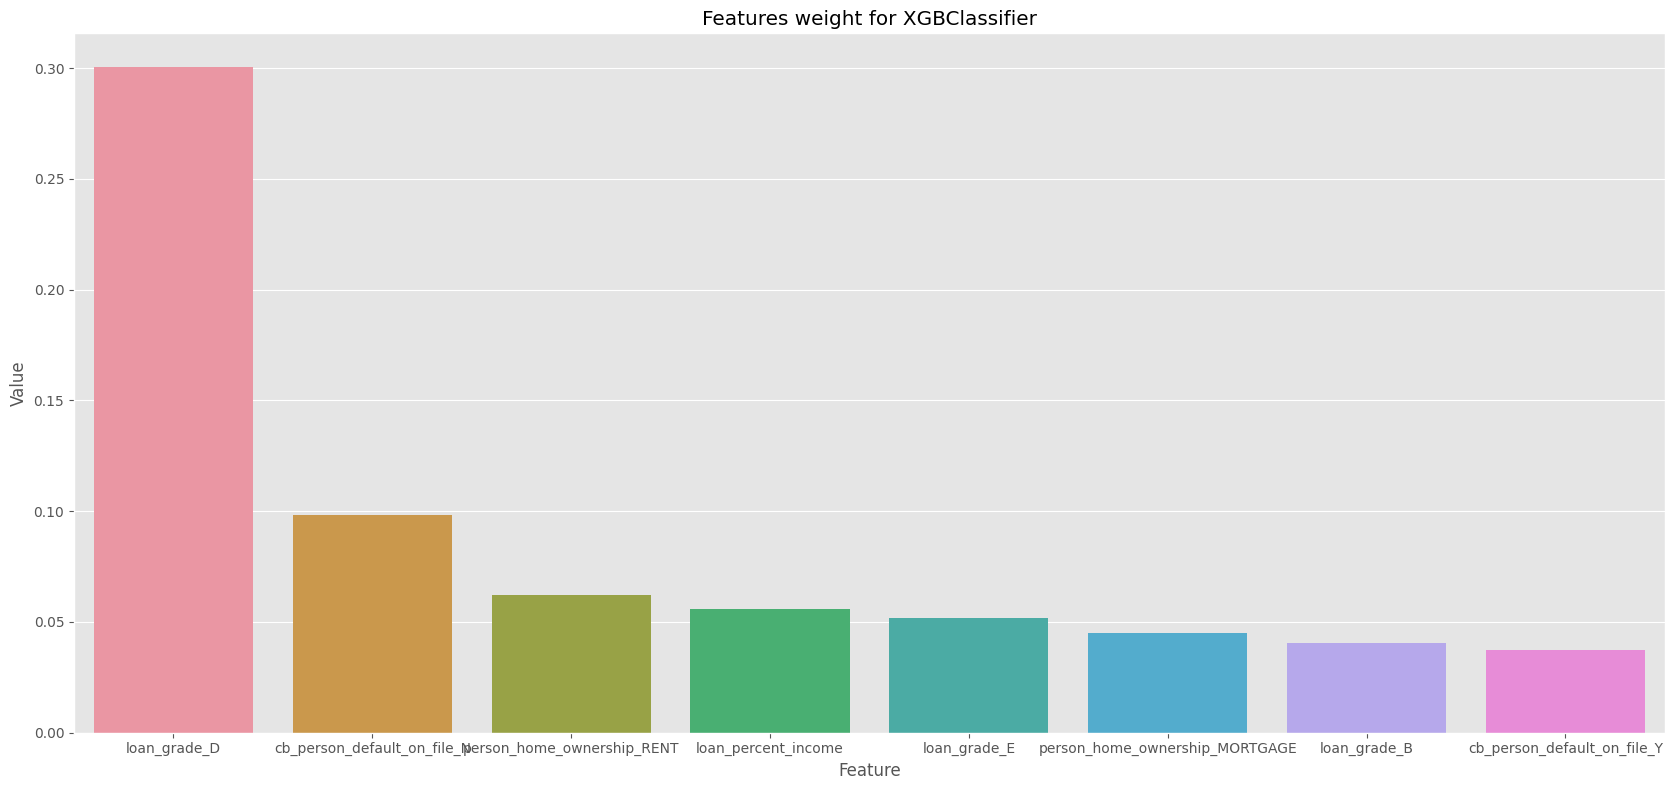

In [33]:
plot_importance(model5, X_train)

## Comparative


In [34]:
model.__name__ = "Neural_Network"

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


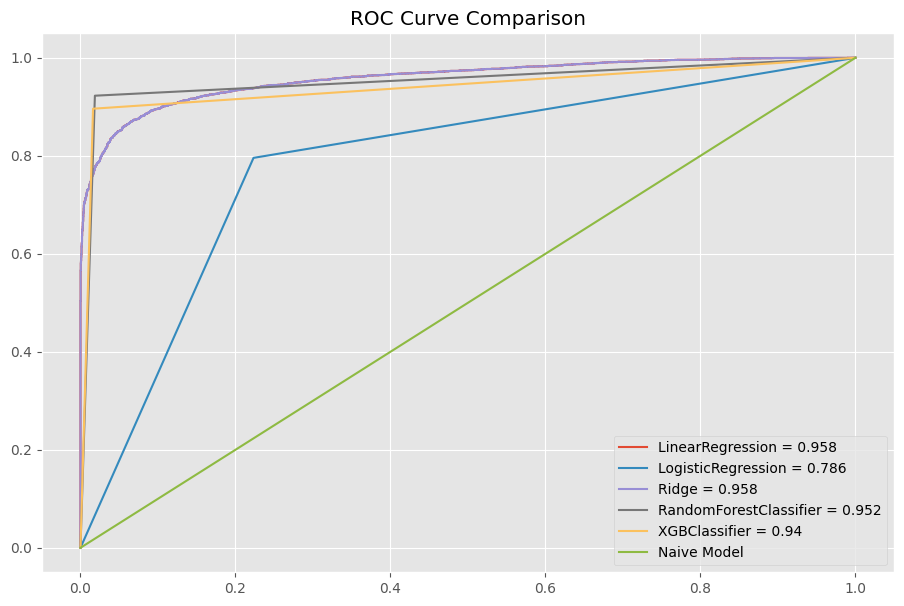

In [35]:
all_models = models+rf_models
plt.figure(figsize=(11, 7))
for model in all_models:
    model.fit(X_train,y_train)
    ytest_pred = model.predict(X_test)
    fpr, tpr, thresh = roc_curve(y_test, ytest_pred)
    aucknn = roc_auc_score(y_test, ytest_pred)
    plt.plot(fpr, tpr, label=f'{type(model).__name__} = {str(round(aucknn,3))}')
plt.plot([0,1],[0,1], label="Naive Model")
plt.title(f"ROC Curve Comparison")
plt.legend();

## Neural Network

In [36]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7271 - loss: 1.2279 - val_accuracy: 0.8443 - val_loss: 0.3280
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8668 - loss: 0.3680 - val_accuracy: 0.8911 - val_loss: 0.2829
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8789 - loss: 0.3473 - val_accuracy: 0.8945 - val_loss: 0.2715
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8838 - loss: 0.3764 - val_accuracy: 0.8977 - val_loss: 0.2758
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8823 - loss: 0.3528 - val_accuracy: 0.9007 - val_loss: 0.2827
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8889 - loss: 0.3514 - val_accuracy: 0.8955 - val_loss: 0.2800
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8857 - loss: 0.4894 - val_accuracy: 0.8946 - val_loss: 0.2797
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8884 - loss: 0.3181 - val_accuracy: 0.8990 - v

Text(0.5, 1.0, 'Accuracy Evolution')

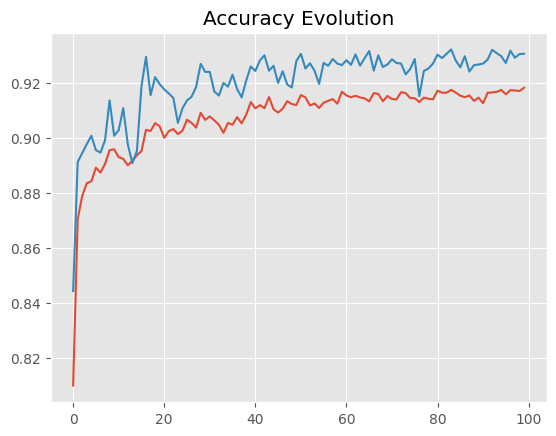

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import keras
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=0.1), metrics=['accuracy'])
history = model.fit(scaler.transform(X_train), y_train, epochs=100, batch_size = 456, validation_data=(scaler.transform(X_test), y_test))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy Evolution")

281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


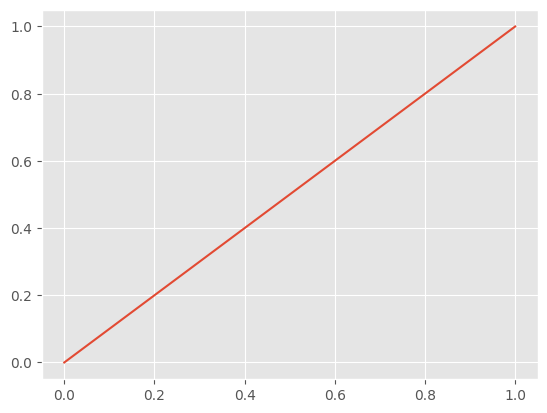

In [39]:
ytest_pred = model.predict(X_test)
fpr, tpr, thresh = roc_curve(y_test, ytest_pred)
aucknn = roc_auc_score(y_test, ytest_pred)
plt.plot(fpr, tpr, label=f'{type(model).__name__} = {str(round(aucknn,3))}')